In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import decomposition

In [2]:
IrisDS=datasets.load_iris()

#### Iris data set understanding

In [3]:
print(IrisDS.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
IrisDS.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
type(IrisDS.data)

numpy.ndarray

In [10]:
print(list(IrisDS.target_names))

['setosa', 'versicolor', 'virginica']


In [11]:
print(list(IrisDS.target))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [77]:
IrisDS.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
IrisDS.target.shape

(150,)

### Processing

In [24]:
IrisDF=pd.DataFrame(data=IrisDS.data,columns=IrisDS.feature_names)

**Normalizing**

In [26]:
IrisDF.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [29]:
IrisDF_norm=(IrisDF-IrisDF.mean())/IrisDF.std()

In [30]:
IrisDF_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [47]:
#Gets values as array
IrisDF_norm.values

array([[-8.97673879e-01,  1.02861128e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00, -1.24540379e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.38072709e+00,  3.36720285e-01, -1.39346985e+00,
        -1.30859282e+00],
       [-1.50149039e+00,  1.06089953e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.01843718e+00,  1.25924161e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-5.35383973e-01,  1.95113261e+00, -1.16676652e+00,
        -1.04652483e+00],
       [-1.50149039e+00,  7.97980949e-01, -1.33679402e+00,
        -1.17755883e+00],
       [-1.01843718e+00,  7.97980949e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.74301699e+00, -3.55170711e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00,  1.06089953e-01, -1.28011819e+00,
        -1.43962681e+00],
       [-5.35383973e-01,  1.48987194e+00, -1.28011819e+00,
        -1.30859282e+00],
       [-1.25996379e+00,  7.97980949e-01, -1.22344235e+00,
      

In [100]:
# Verify after normalization if thhe mean is zero and std is 1. The mean is not zero but the stand dev is 1
IrisDF_norm['sepal length (cm)'].mean()
IrisDF_norm['sepal width (cm)'].mean()
IrisDF_norm['petal length (cm)'].mean()
IrisDF_norm['petal width (cm)'].mean()

print('sepal length (cm)',IrisDF_norm['sepal length (cm)'].mean())
print('sepal width (cm)',IrisDF_norm['sepal width (cm)'].mean())
print('petal length (cm)',IrisDF_norm['petal length (cm)'].mean())
print('petal width (cm)',IrisDF_norm['petal width (cm)'].mean())

sepal length (cm) -1.457167719820518e-15
sepal width (cm) -1.7225110227059304e-15
petal length (cm) -2.0435505139933714e-15
petal width (cm) -9.843977485009722e-17


#### PCA Analysis

In [48]:
Iris_PCA=decomposition.PCA(n_components=4)

In [49]:
Iris_PCA.fit_transform(IrisDF_norm.values)

array([[-2.25698063e+00,  5.04015404e-01, -1.21536190e-01,
        -2.29962838e-02],
       [-2.07945912e+00, -6.53216394e-01, -2.26492063e-01,
        -1.02863642e-01],
       [-2.36004408e+00, -3.17413945e-01,  5.13077379e-02,
        -2.77323192e-02],
       [-2.29650366e+00, -5.73446613e-01,  9.85303586e-02,
         6.60900544e-02],
       [-2.38080159e+00,  6.72514411e-01,  2.13563034e-02,
         3.72724209e-02],
       [-2.06362348e+00,  1.51347827e+00,  3.05818064e-02,
        -4.38408784e-03],
       [-2.43754534e+00,  7.43137171e-02,  3.41055070e-01,
         3.79693659e-02],
       [-2.22638327e+00,  2.46787172e-01, -8.22987560e-02,
         2.54200029e-02],
       [-2.33413810e+00, -1.09148977e+00,  1.53049668e-01,
         2.67043670e-02],
       [-2.18136797e+00, -4.47131117e-01, -2.45736283e-01,
         3.97740567e-02],
       [-2.15626287e+00,  1.06702096e+00, -2.63127870e-01,
        -1.52500486e-02],
       [-2.31960686e+00,  1.58057946e-01,  9.98311719e-02,
      

In [61]:
print(np.array(IrisDF_norm.columns))

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


In [78]:

#This gives the % of the variance explanied by each variable
#Note we are looking for the variables which have maximuum variance and min error
#72.7% variance explained by Sepal.width
#23% variance explained by Sepal.length
percent_variance=np.round(Iris_PCA.explained_variance_ratio_*100,decimals=2)
print(list(zip(np.array(IrisDF_norm.columns),percent_variance)))

[('sepal length (cm)', 72.77), ('sepal width (cm)', 23.03), ('petal length (cm)', 3.68), ('petal width (cm)', 0.52)]


In [88]:
#Let us calculate the Cummulative
cumsum=np.cumsum(percent_variance)
print(list(cumsum))

[72.77, 95.8, 99.48, 100.0]


In [64]:
# Display Eigen values of the PCA Analyss
print (Iris_PCA.explained_variance_)

[2.89141263 0.91507946 0.14637092 0.02047032]


## Do a PCA Analysis using preprocessing and find the PCA features.
* These are new features or variables and are a combination of the existing features

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing 

In [97]:
IrisDS=datasets.load_iris()
IrisDF=pd.DataFrame(IrisDS.data,columns=IrisDS.feature_names)
IrisDF.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
# Normalization of data using sklearn preprocessing
IrisDS_Scaled=pd.DataFrame(preprocessing.scale(IrisDF),columns=IrisDF.columns)

In [102]:
IrisDS_Scaled.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [104]:
print('sepal length (cm)',IrisDS_Scaled['sepal length (cm)'].mean())
print('sepal width (cm)',IrisDS_Scaled['sepal width (cm)'].mean())
print('petal length (cm)',IrisDS_Scaled['petal length (cm)'].mean())
print('petal width (cm)',IrisDS_Scaled['petal width (cm)'].mean())

sepal length (cm) -1.6903145549918008e-15
sepal width (cm) -1.6370238498097932e-15
petal length (cm) -1.4825178122161257e-15
petal width (cm) -1.6231460620019788e-15


In [118]:
IrisScaled_PCA=decomposition.PCA(n_components=2)

In [119]:
IrisScaled_PCA.fit_transform(IrisDS_Scaled.values)

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [120]:
PCAComponent_DF=pd.DataFrame(data=IrisScaled_PCA.components_,columns=IrisDS_Scaled.columns,index=['PCA-1','PCA-2'])
PCAComponent_DF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA-1,0.522372,-0.263355,0.581254,0.565611
PCA-2,0.372318,0.925556,0.021095,0.065416


In [108]:
IrisScaled_PCA.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [109]:
IrisScaled_PCA.explained_variance_

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [121]:
IrisScaled_PCA.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

([<matplotlib.axis.XTick at 0xa95ae32c50>,
 <a list of 4 Text xticklabel objects>)

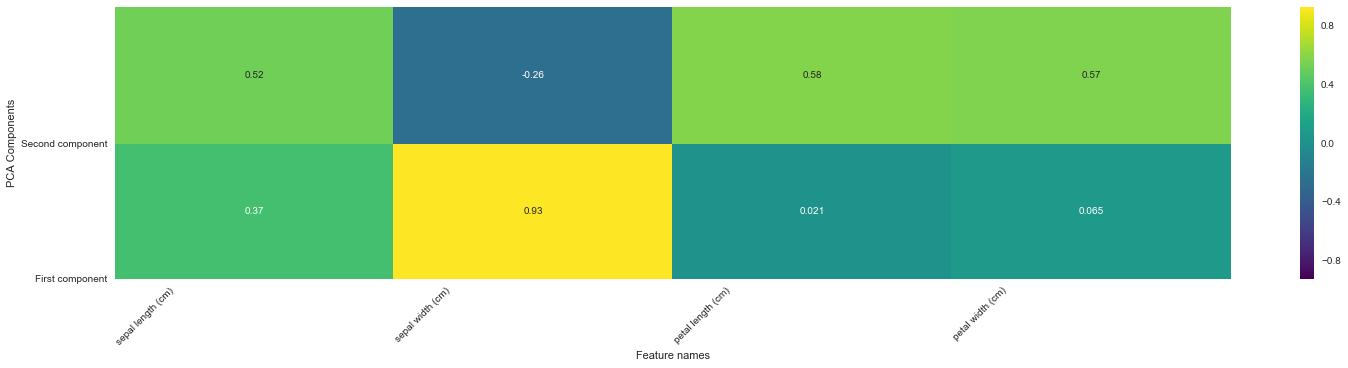

In [172]:
plt.figure(figsize=[25,5])
htmap=sns.heatmap(IrisScaled_PCA.components_[0:2,:],annot=True,cmap='viridis')
plt.ylabel('PCA Components')
plt.xlabel('Feature names')
plt.yticks([0,1],["First component","Second component"],rotation=0,ha="right")
plt.xticks(range(len(IrisDS.feature_names)),IrisDS.feature_names,rotation=45,ha="left")
#plt.xticks(range(len(IrisDS_Scaled.columns)),IrisDS_Scaled.columns,rotation=45,ha="left")

In [142]:
IrisDS.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [144]:
list(IrisDS_Scaled.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [159]:
type(range(len(IrisDS.feature_names)))

range

In [169]:
range(len(IrisDS_Scaled.columns))

range(0, 4)